<a href="https://colab.research.google.com/github/vitaoTM/Alura-BootCamp-DataScience/blob/main/Analise_de_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=pink> Importando ferramentas 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <font color=pink> Baixando os dados as serem trabalhados

### **Analizando as notas no geral**

In [12]:
notas = pd.read_csv('/content/drive/MyDrive/ALURA DATA SCIENCE/introducao-a-data-science-aula0/introducao-a-data-science-aula0/aula0/ml-latest-small/ratings.csv')
notas.columns = ['usuarioID', 'filmesID', 'nota', 'tempo']
notas.head()

,usuarioID,filmesID,nota,tempo
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<font size=6> **Olhando os filmes**

In [13]:
filmes = pd.read_csv('/content/drive/MyDrive/ALURA DATA SCIENCE/introducao-a-data-science-aula0/introducao-a-data-science-aula0/aula0/ml-latest-small/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
filmes.columns = ['filmesID', 'titulo', 'genros']
filmes.head()

,filmesID,titulo,genros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## <font color=green> Analisando algumas notas especificas por filme

In [20]:
notas.query('filmesID==1').nota.mean()

3.9209302325581397

<font size=6> **Agrupando notas por filme e tirando a media dessas notas**

In [22]:
notas.groupby('filmesID')

In [25]:
medias_por_filme = notas.groupby('filmesID').mean()['nota']
medias_por_filme.head(10)

filmesID
1     3.920930
2     3.431818
3     3.259615
4     2.357143
5     3.071429
6     3.946078
7     3.185185
8     2.875000
9     3.125000
10    3.496212
Name: nota, dtype: float64

## <font color= pink> <font size = 6> Plotando Gráficos com Bibliotecas:
* <font color=pink> **Pandas**
* <font color=pink> **Seaborn**
* <font color=pink> **MatPlotLib**

**Grafico de distribuicao das notas**

* O grafico apresenta a frequencia que uma nota foi dada.
* Observa-se que a concentração é maior entre as notas 3 e 4.5  

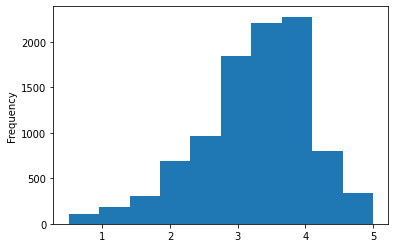

In [39]:
# Padrão do pandas 
medias_por_filme.plot(kind='hist')

Text(0.5, 1.0, 'Histograma das medias dos filmes')

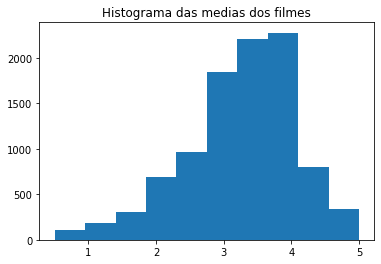

In [40]:
# MatPlotLib
plt.hist(medias_por_filme)
plt.title('Histograma das medias dos filmes')

**Grafico do tipo BoxPlot**

* Nesse grafico, melhor se visualiza a distribuição das notas.
* Repara-se que 50% das notas estão na faixa de ~2.8 ~4.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


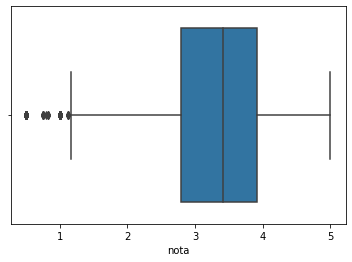

In [41]:
# SeaBorn
sns.boxplot(medias_por_filme)

**Gráfico de dispersão**

*  Nesse gráfico é mostrado a distribuição de notas, onde na curva e observado a maior frequencia de notas.
* Nota-se que essa curva de distribuição é dividida em 10 partes, onde a há um incremento da nota de 0.5 em 0.5. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


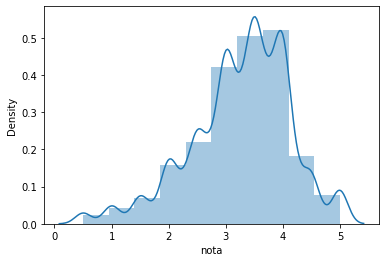

In [42]:
#SeaBorn
sns.distplot(medias_por_filme, bins=10)

## <font color=green> **Importando outra base de dados (TMDB)**

In [44]:
tmdb = pd.read_csv('/content/drive/MyDrive/ALURA DATA SCIENCE/introducao-a-data-science-aula0/introducao-a-data-science-aula0/aula0/ml-latest-small/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [45]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [50]:
contagem_de_linguas = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ['linguagem', 'total']
contagem_de_linguas.head()

,linguagem,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


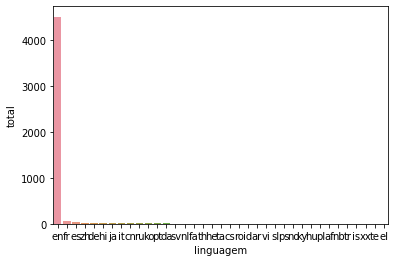

In [51]:
sns.barplot(data= contagem_de_linguas, x='linguagem', y='total')

In [56]:
print(sns.__version__)

0.11.2
